In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
%matplotlib inline


/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_excel("combinedData.xlsx")

In [3]:
df.head()

,Location,Game_mode,Placed,Kills
0,D4,SOLO,30,0
1,C7,SOLO,60,1
2,D7,SOLO,14,0
3,G6,SOLO,17,1
4,D6,DUO,43,0


In [4]:
df.isnull().any()

Location     False
Game_mode    False
Placed       False
Kills        False
dtype: bool

In [5]:
df.Game_mode.replace(to_replace=dict(SOLO=0, DUO=1, SQUAD=2, Solo=0, Duo =1, Squad = 2), inplace=True)

In [6]:
df=df.drop([20])

In [7]:
df

,Location,Game_mode,Placed,Kills
0,D4,0,30,0
1,C7,0,60,1
2,D7,0,14,0
3,G6,0,17,1
4,D6,1,43,0
5,G6,1,28,0
6,G8,1,35,1
7,F5,1,50,0
8,H6,1,47,1
9,A5,1,49,0


In [8]:
?np.arange


/Users/shivanikohli/Documents/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


(-1, 10)

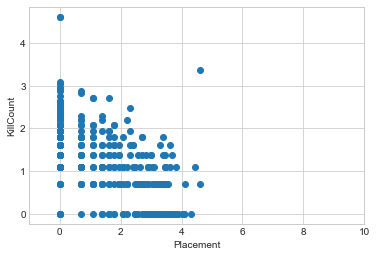

In [19]:
import seaborn as sns

plt.scatter(np.log(df.iloc[:,2]),np.log(df.iloc[:,3]))
plt.ylabel("KillCount")
plt.xlabel("Placement")
plt.xlim(-1,10)



Text(0.5,0,'Placement')

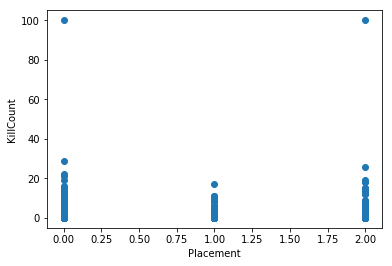

In [10]:
plt.scatter(df["Game_mode"], df["Kills"])
plt.ylabel("KillCount")
plt.xlabel("Placement")

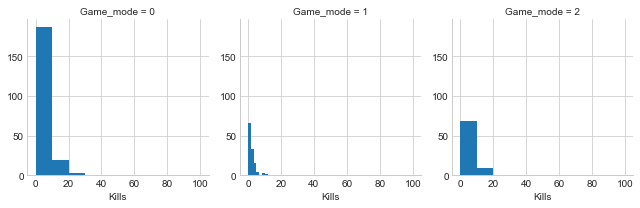

In [11]:
sns.set_style("whitegrid")
multiples = sns.FacetGrid(df, col = "Game_mode")
multiples = multiples.map(plt.hist, "Kills")

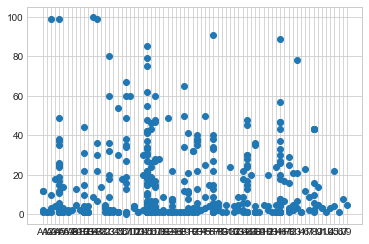

In [14]:
plt.scatter( df["Location"],df["Placed"])

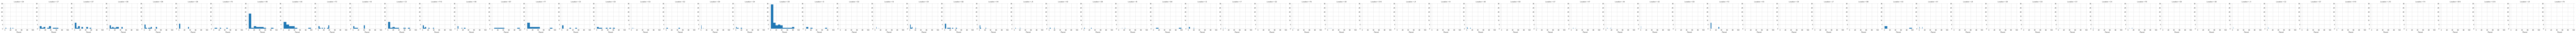

In [15]:
multiples = sns.FacetGrid(df, col = "Location")
multiples = multiples.map(plt.hist, "Placed")

In [22]:
import statsmodels.api as sm

Y = df["Placed"]
X = df[["Kills", "Game_mode"]]

model = sm.OLS(Y,X.astype(float)).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Placed   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     37.76
Date:                Mon, 16 Apr 2018   Prob (F-statistic):           8.72e-16
Time:                        15:21:43   Log-Likelihood:                -1881.2
No. Observations:                 414   AIC:                             3766.
Df Residuals:                     412   BIC:                             3774.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Kills          0.0010      0.131      0.007      0.9

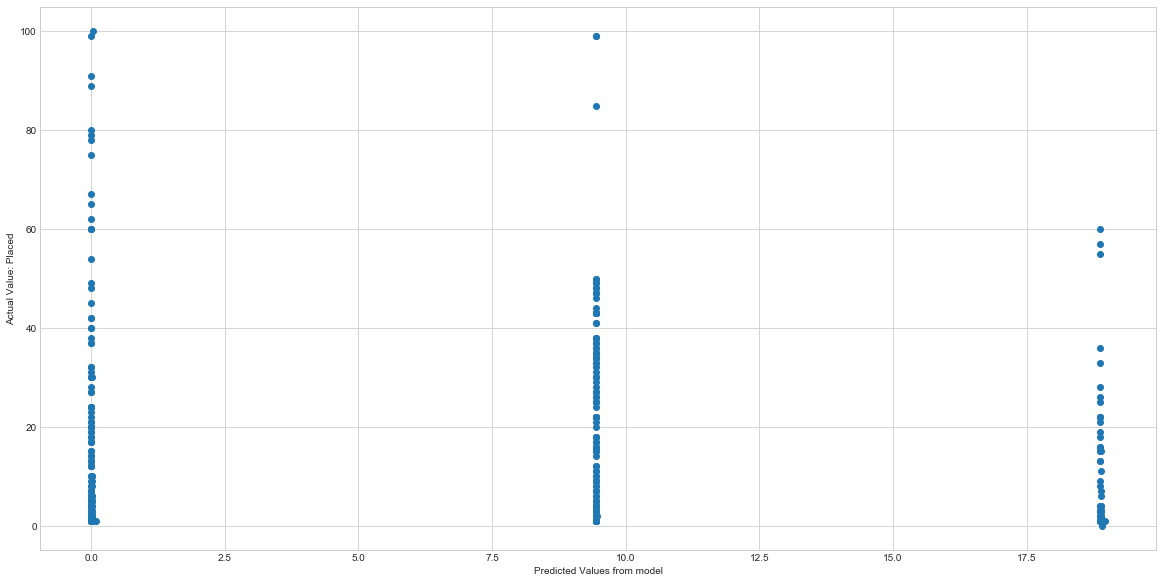

In [23]:
predictions = model.predict(X)
plt.figure(figsize = (20,10))
plt.scatter(predictions, Y)
plt.xlabel("Predicted Values from model")
plt.ylabel("Actual Value: Placed")
plt.show()

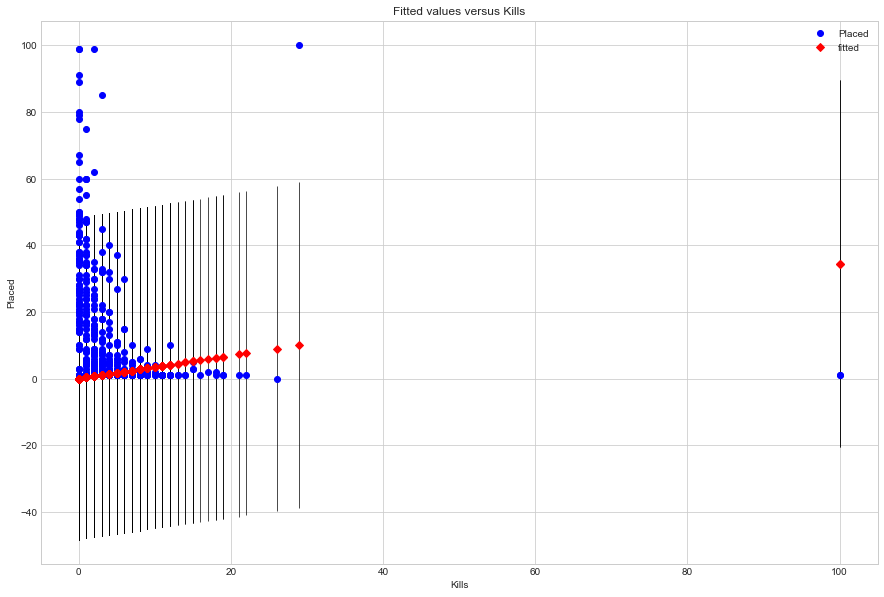

In [27]:
X = df["Kills"]
Y = df["Placed"]

m1 = sm.OLS(Y,X).fit()

fig, ax = plt.subplots(figsize=(15,10))
fig = sm.graphics.plot_fit(m1, 0, ax=ax)
